# Image processing

## 4th Assignment - Shahid Beheshti University 

### Outline

- [Question 1](#0)
- [Question 2](#1)

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error
import numpy as np
from skimage import io
from sklearn.cluster import KMeans
import math
import glob
import random
from skimage.feature import hog
from skimage import data, exposure
from sklearn.model_selection import train_test_split
from skimage.feature import hog
from scipy.spatial.distance import euclidean
from PIL import Image


<a name="0"></a>
## Question 1

Edge and Hole Filling


In [6]:
grayScale1 = cv2.imread('dataset/1/1.jpeg')
grayScale2 = cv2.imread('dataset/1/2.png')
binary1 = cv2.imread('dataset/1/binary1.png')
binary2 = cv2.imread('dataset/1/binary2.png')

Text(0.5, 1.0, 'binary2')

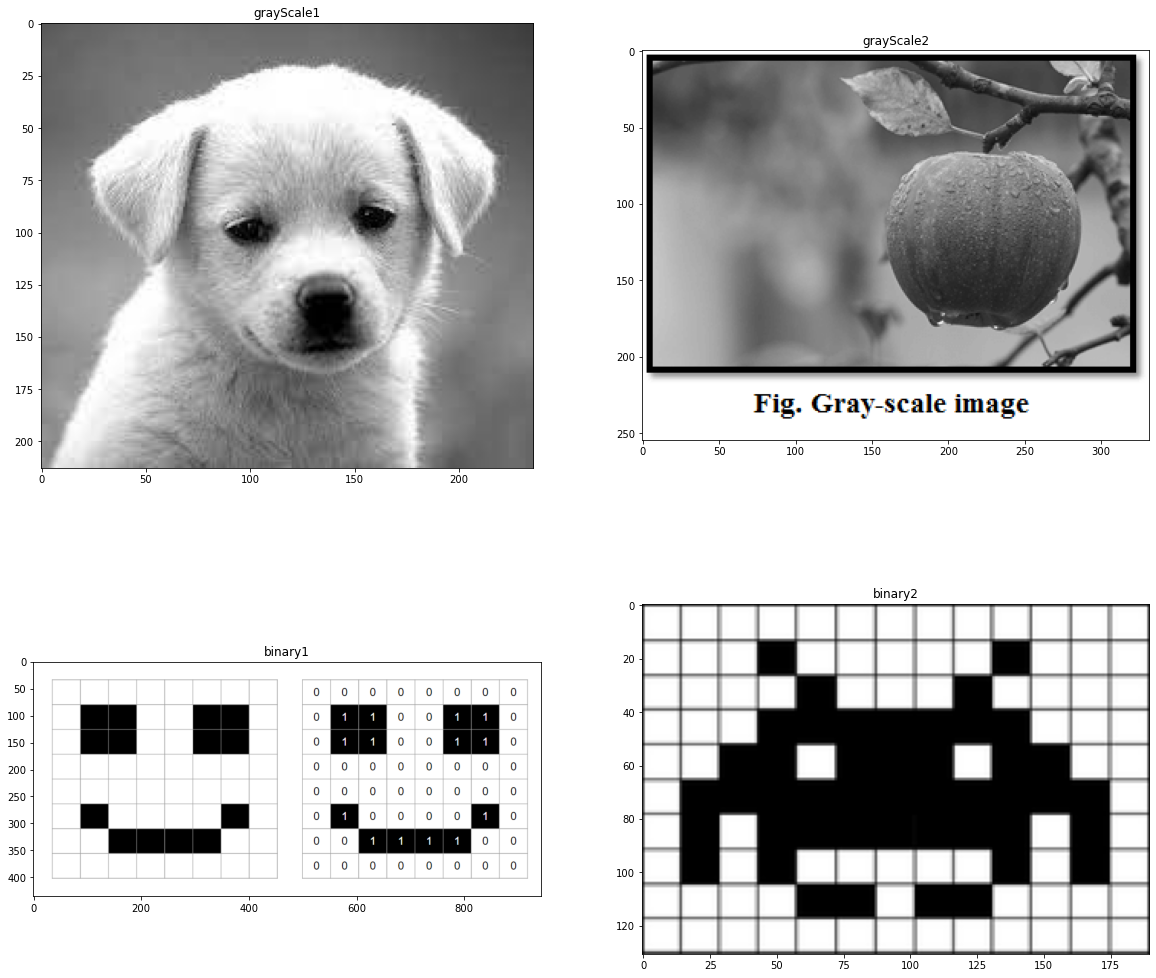

In [8]:
# Display the resulting blended face
fig, ax = plt.subplots(2, 2, figsize=(20, 18))
ax[0][0].imshow(cv2.cvtColor(grayScale1, cv2.COLOR_BGR2RGB))
ax[0][0].set_title('grayScale1')
ax[0][1].imshow(cv2.cvtColor(grayScale2, cv2.COLOR_BGR2RGB))
ax[0][1].set_title('grayScale2')
ax[1][0].imshow(cv2.cvtColor(binary1, cv2.COLOR_BGR2RGB))
ax[1][0].set_title('binary1')
ax[1][1].imshow(cv2.cvtColor(binary2, cv2.COLOR_BGR2RGB))
ax[1][1].set_title('binary2')


In [25]:
def edge_detection(image,binary):
    if binary:
        kernel = np.ones((3, 3), np.uint8)
        dilated = cv2.dilate(image, kernel, iterations=1)
        edges = dilated - image
    else:
        edges = cv2.Canny(image, 100, 200)
    return edges

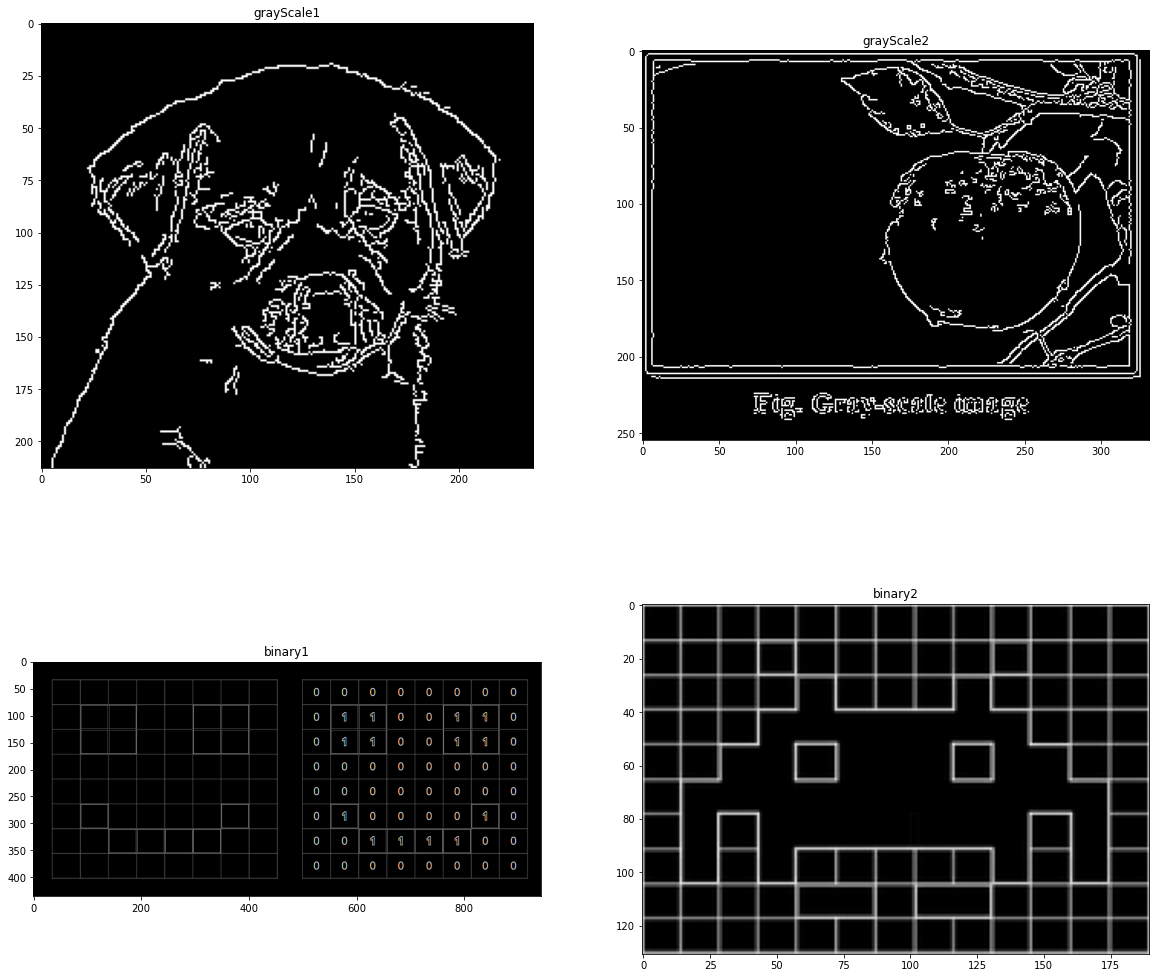

In [29]:
# Perform edge detection
edges_binary1 = edge_detection(binary1,True)
edges_gray1 = edge_detection(grayScale1,False)
edges_binary2 = edge_detection(binary2,True)
edges_gray2 = edge_detection(grayScale2,False)


# Display the results
fig, ax = plt.subplots(2, 2, figsize=(20, 18))
ax[0][0].imshow(edges_gray1, cmap='gray')
ax[0][0].set_title('grayScale1')
ax[0][1].imshow(edges_gray2, cmap='gray')
ax[0][1].set_title('grayScale2')
ax[1][0].imshow(edges_binary1, cmap='gray')
ax[1][0].set_title('binary1')
ax[1][1].imshow(edges_binary2, cmap='gray')
ax[1][1].set_title('binary2')
plt.show()

In [30]:
def hole_filling(image, binary):
    if binary:
        _, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
        kernel = np.ones((3, 3), np.uint8)
        filled = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
    else:
        _, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
        kernel = np.ones((3, 3), np.uint8)
        eroded = cv2.erode(binary, kernel, iterations=1)
        filled = cv2.dilate(eroded, kernel, iterations=1)
    return filled

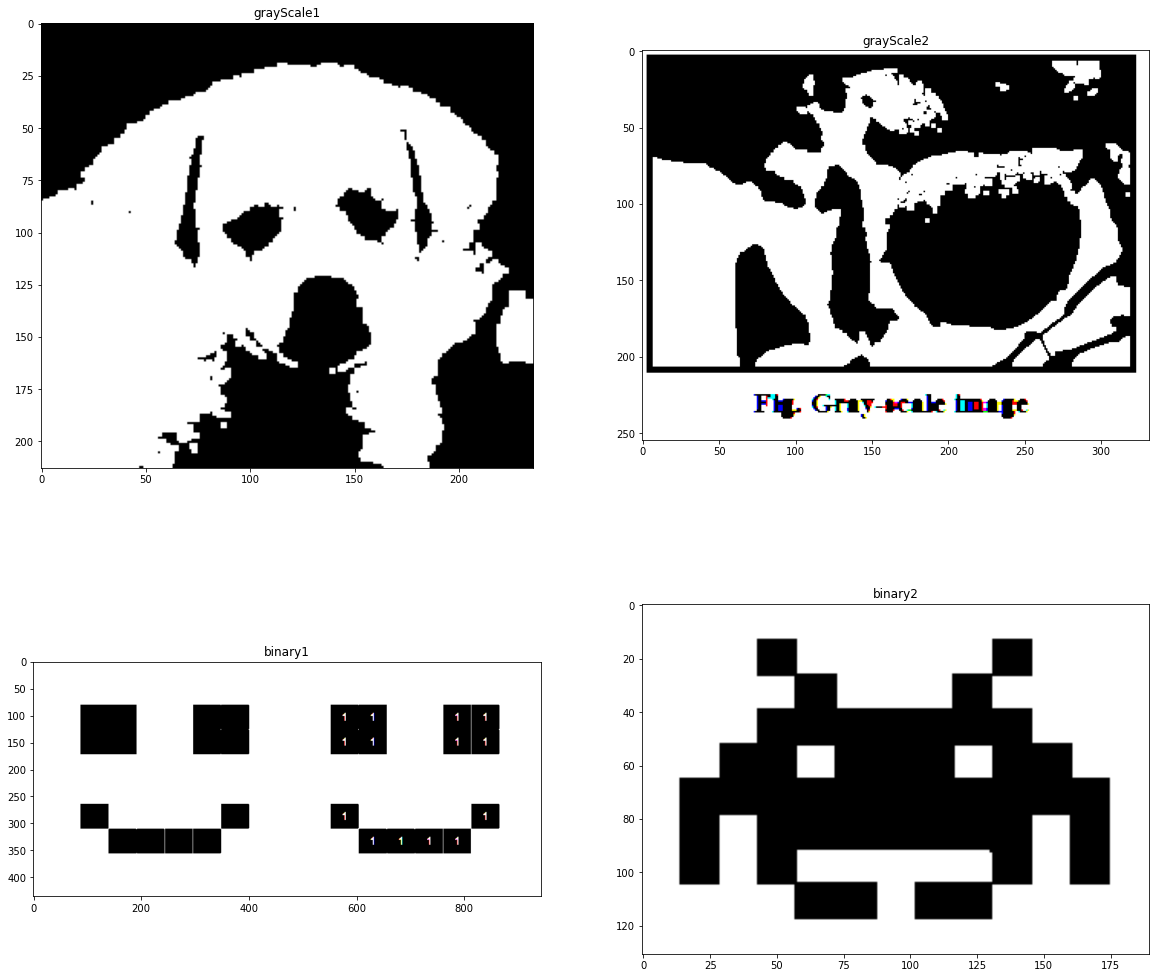

In [31]:
# Perform hole filling
filled_binary1 = hole_filling(binary1, True)
filled_binary2 = hole_filling(binary2, True)
filled_gray1 = hole_filling(grayScale1, False)
filled_gray2 = hole_filling(grayScale2, False)


# Display the results
fig, ax = plt.subplots(2, 2, figsize=(20, 18))
ax[0][0].imshow(filled_gray1, cmap='gray')
ax[0][0].set_title('grayScale1')
ax[0][1].imshow(filled_gray2, cmap='gray')
ax[0][1].set_title('grayScale2')
ax[1][0].imshow(filled_binary1, cmap='gray')
ax[1][0].set_title('binary1')
ax[1][1].imshow(filled_binary2, cmap='gray')
ax[1][1].set_title('binary2')
plt.show()

In [35]:
lena = cv2.imread('dataset/1/lena.TIF', 0)

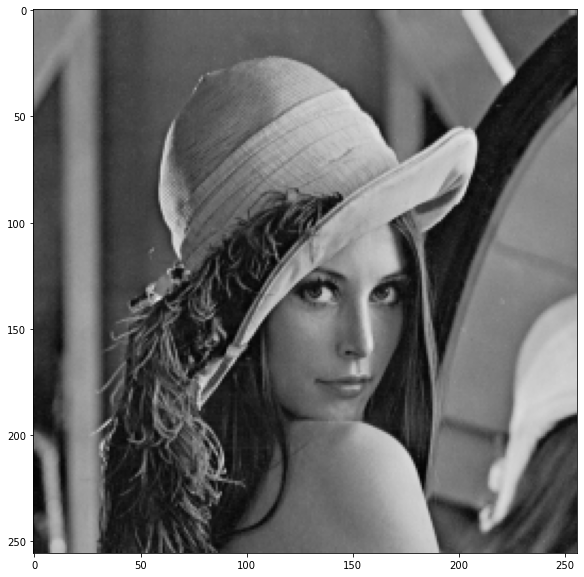

In [36]:
figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(lena, cv2.COLOR_BGR2RGB))

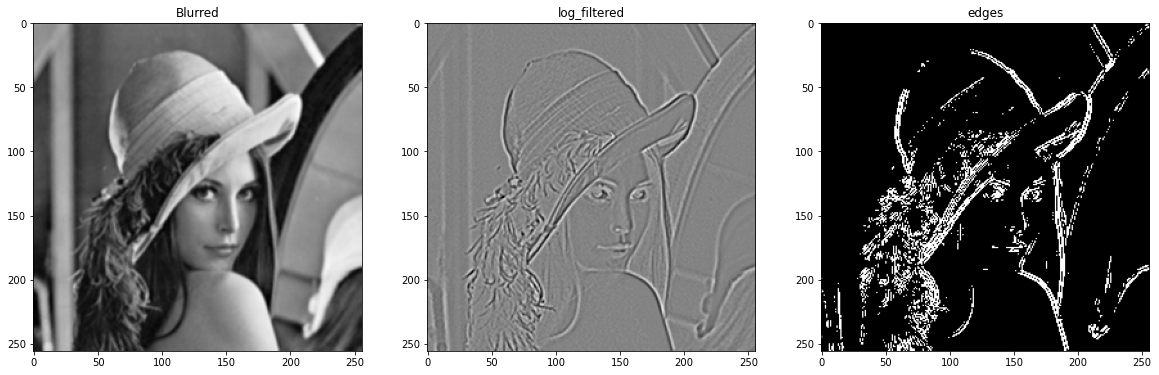

In [37]:

# Apply Gausian blur
blurred = cv2.GaussianBlur(lena, (3, 3), 0)

# Apply Laplacian of Gausian (LOG) filter
log_filtered = cv2.Laplacian(blurred, cv2.CV_64F)

# Apply thresholding to obtain edges
_, edges = cv2.threshold(np.abs(log_filtered), 20, 255, cv2.THRESH_BINARY)

# Display the blurred log filtereed and edges
fig, ax = plt.subplots(1, 3, figsize=(20, 15))
ax[0].imshow(blurred, cmap='gray')
ax[0].set_title('Blurred')

ax[1].imshow(log_filtered, cmap='gray')
ax[1].set_title('log_filtered')

ax[2].imshow(edges, cmap='gray')
ax[2].set_title('edges')
plt.show()

Text(0.5, 1.0, 'Edges (LOG Filter)')

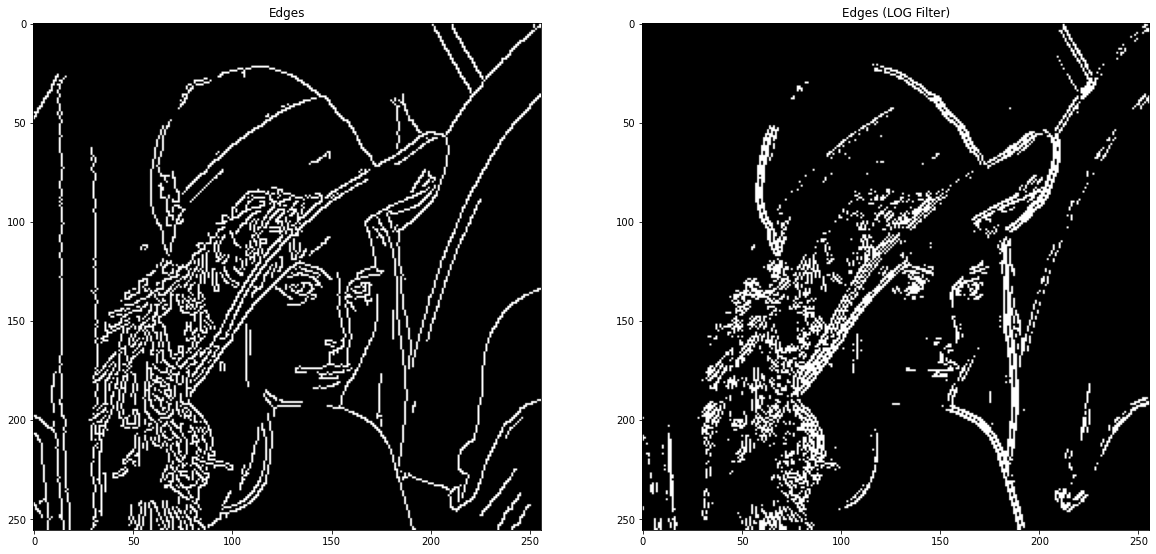

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(20, 15))
ax[0].imshow(edge_detection(lena,False), cmap='gray')
ax[0].set_title('Edges')
ax[1].imshow(edges, cmap='gray')
ax[1].set_title('Edges (LOG Filter)')

# 

<a name="1"></a>
## Question 2
Texture synthesis

In [2]:
img1 = cv2.imread('dataset/2/1.png')
img2 = cv2.imread('dataset/2/2.png')
img3 = cv2.imread('dataset/2/3.png')
img4 = cv2.imread('dataset/2/4.png')

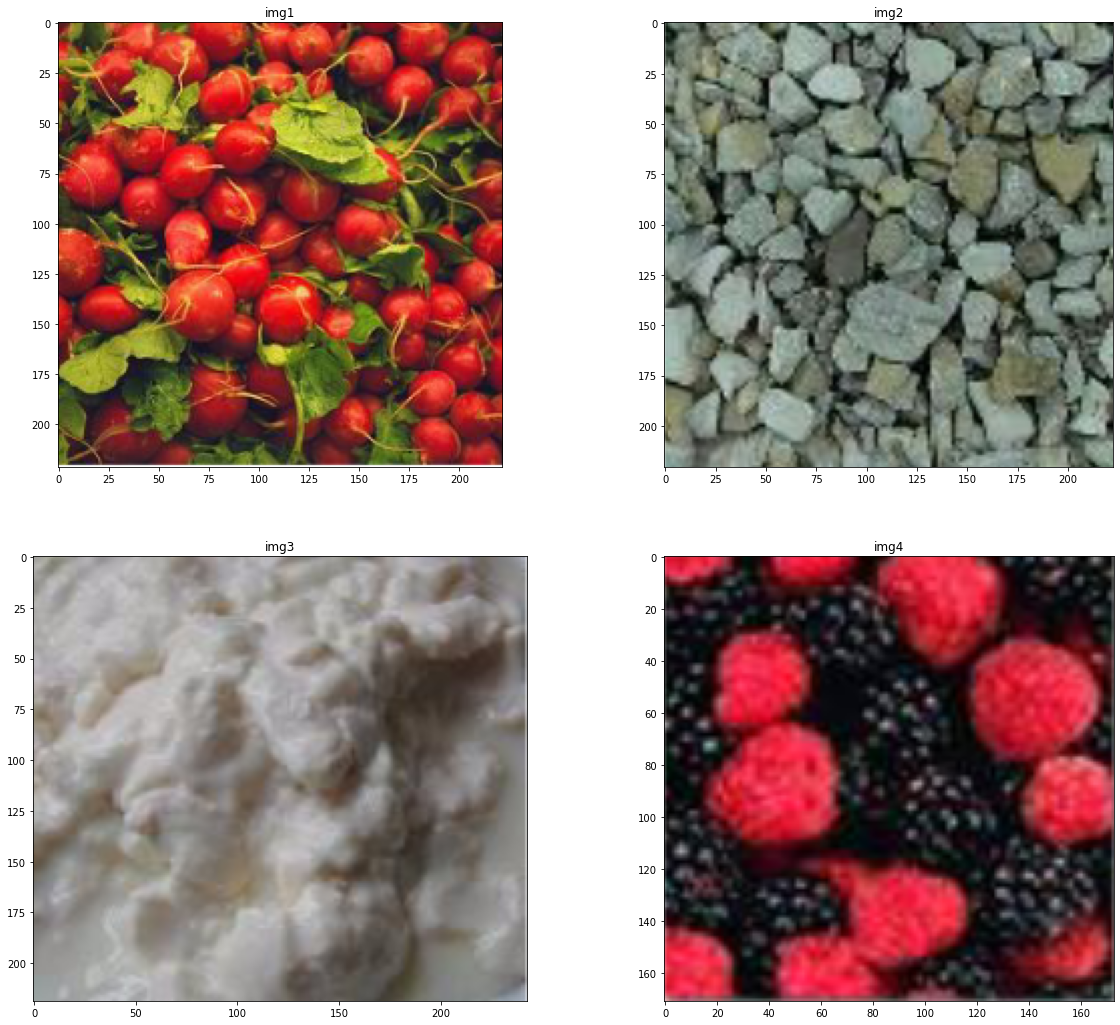

In [3]:
# Display the results
fig, ax = plt.subplots(2, 2, figsize=(20, 18))
ax[0][0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
ax[0][0].set_title('img1')
ax[0][1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax[0][1].set_title('img2')
ax[1][0].imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
ax[1][0].set_title('img3')
ax[1][1].imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
ax[1][1].set_title('img4')
plt.show()

In [4]:
def texture_synthesis(path,block_size):
    output_texture = 0
    input_texture = Image.open(path)
    width, height = input_texture.size

    # Determine the number of blocks in each dimension
    num_blocks_x = width // block_size
    num_blocks_y = height // block_size

    # Initialize the output texture
    output_texture = Image.new('RGB', (width, height))

    # Iterate over each block
    for y in range(num_blocks_y):
        for x in range(num_blocks_x):
            output_x = x * block_size
            output_y = y * block_size
            random_x = random.randint(0, width - block_size)
            random_y = random.randint(0, height - block_size)
            random_block = input_texture.crop((random_x, random_y, random_x + block_size, random_y + block_size))
            output_texture.paste(random_block, (output_x, output_y))

    return output_texture
    

In [49]:
path1= 'dataset/2/1.png'
path2= 'dataset/2/2.png'
path3= 'dataset/2/3.png'
path4= 'dataset/2/4.png'
outputTexture1 = texture_synthesis(path1,20)
outputTexture2 = texture_synthesis(path2,20)
outputTexture3 = texture_synthesis(path3,8)
outputTexture4 = texture_synthesis(path4,8)

In [50]:
output_texture1 = np.array(outputTexture1)
output_texture1 = cv2.cvtColor(output_texture1, cv2.COLOR_BGR2RGB)
output_texture2 = np.array(outputTexture2)
output_texture2 = cv2.cvtColor(output_texture2, cv2.COLOR_BGR2RGB)
output_texture3 = np.array(outputTexture3)
output_texture3 = cv2.cvtColor(output_texture3, cv2.COLOR_BGR2RGB)
output_texture4 = np.array(outputTexture4)
output_texture4 = cv2.cvtColor(output_texture4, cv2.COLOR_BGR2RGB)

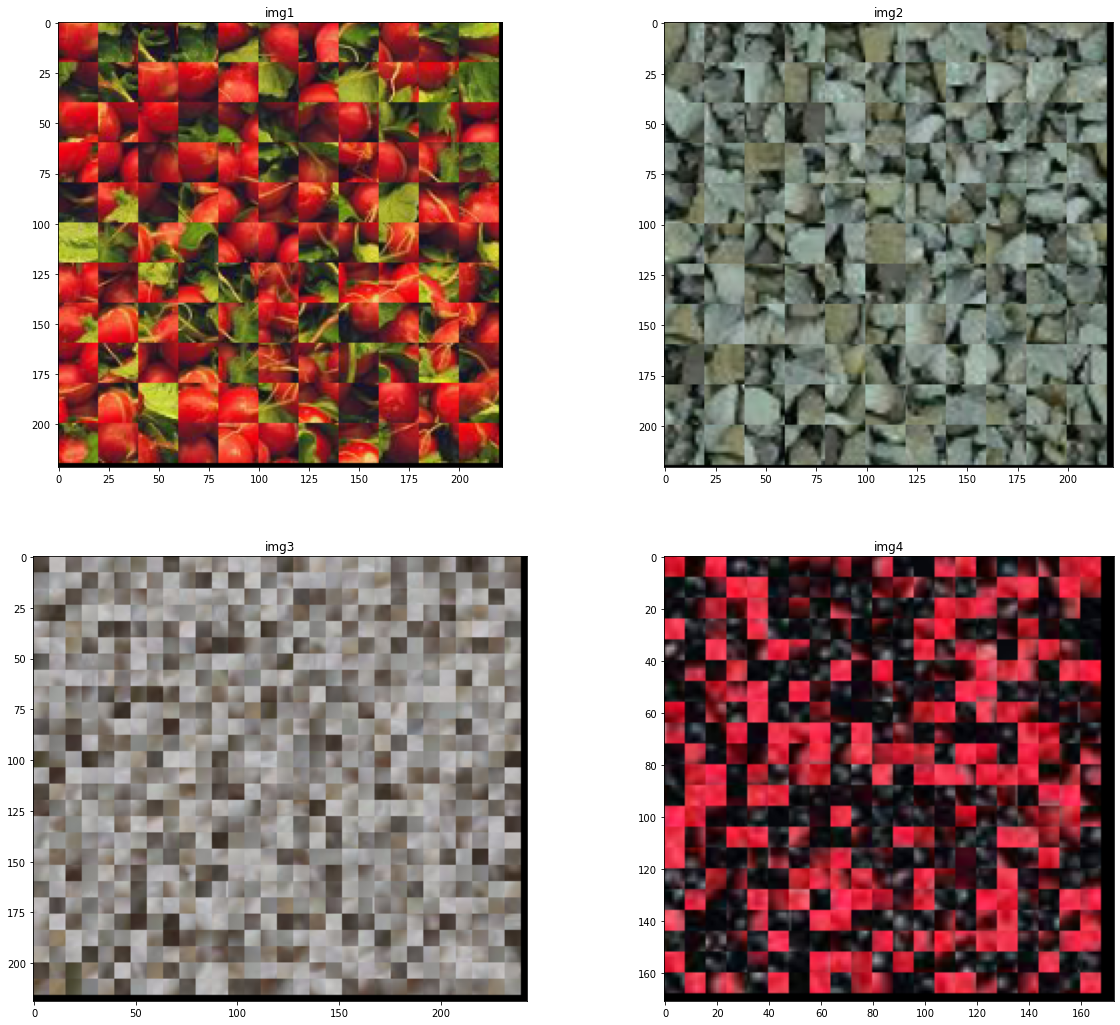

In [51]:
# Display the results
fig, ax = plt.subplots(2, 2, figsize=(20, 18))
ax[0][0].imshow(cv2.cvtColor(output_texture1, cv2.COLOR_BGR2RGB))
ax[0][0].set_title('img1')
ax[0][1].imshow(cv2.cvtColor(output_texture2, cv2.COLOR_BGR2RGB))
ax[0][1].set_title('img2')
ax[1][0].imshow(cv2.cvtColor(output_texture3, cv2.COLOR_BGR2RGB))
ax[1][0].set_title('img3')
ax[1][1].imshow(cv2.cvtColor(output_texture4, cv2.COLOR_BGR2RGB))
ax[1][1].set_title('img4')
plt.show()

In [52]:
ball_image = cv2.imread('dataset/2/ball.jpg')

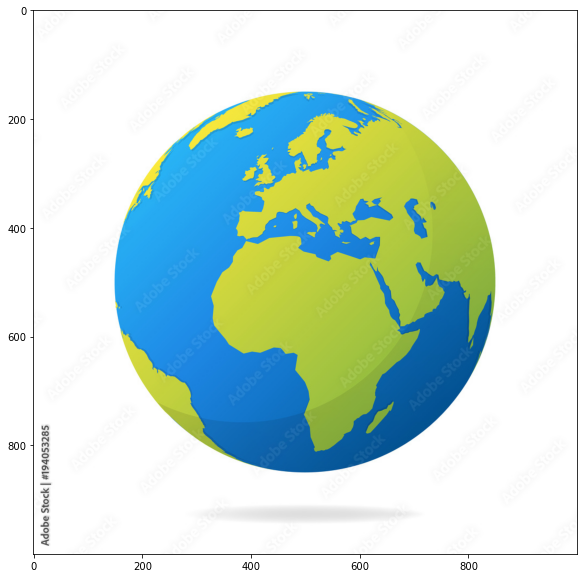

In [53]:
figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(ball_image, cv2.COLOR_BGR2RGB))

In [60]:
def maskOnBall(texture):
    height, width, _ = ball_image.shape
    center_x, center_y = width // 2, height // 2
    radius = min(center_x, center_y) - 10  # Adjust the radius as needed
    mask = np.zeros((height, width), dtype=np.uint8)
    cv2.circle(mask, (center_x, center_y), radius, 255, thickness=-1)

    # Apply the mask to the ball image
    masked_ball = cv2.bitwise_and(ball_image, ball_image, mask=mask)

    # Resize the synthesized texture to match the ball image size
    synthesized_texture_resized = texture.resize((width, height))

    # Convert the synthesized texture to a NumPy array
    synthesized_texture_array = np.array(synthesized_texture_resized)

    # Apply the synthesized texture only where the mask is non-zero
    final_image = np.where(mask[..., np.newaxis] != 0, synthesized_texture_array, masked_ball)
    final_image = cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)

    
    return final_image
    # Convert the final image to PIL Image format
    result = Image.fromarray(final_image)

    # Display the final result
    result.show()

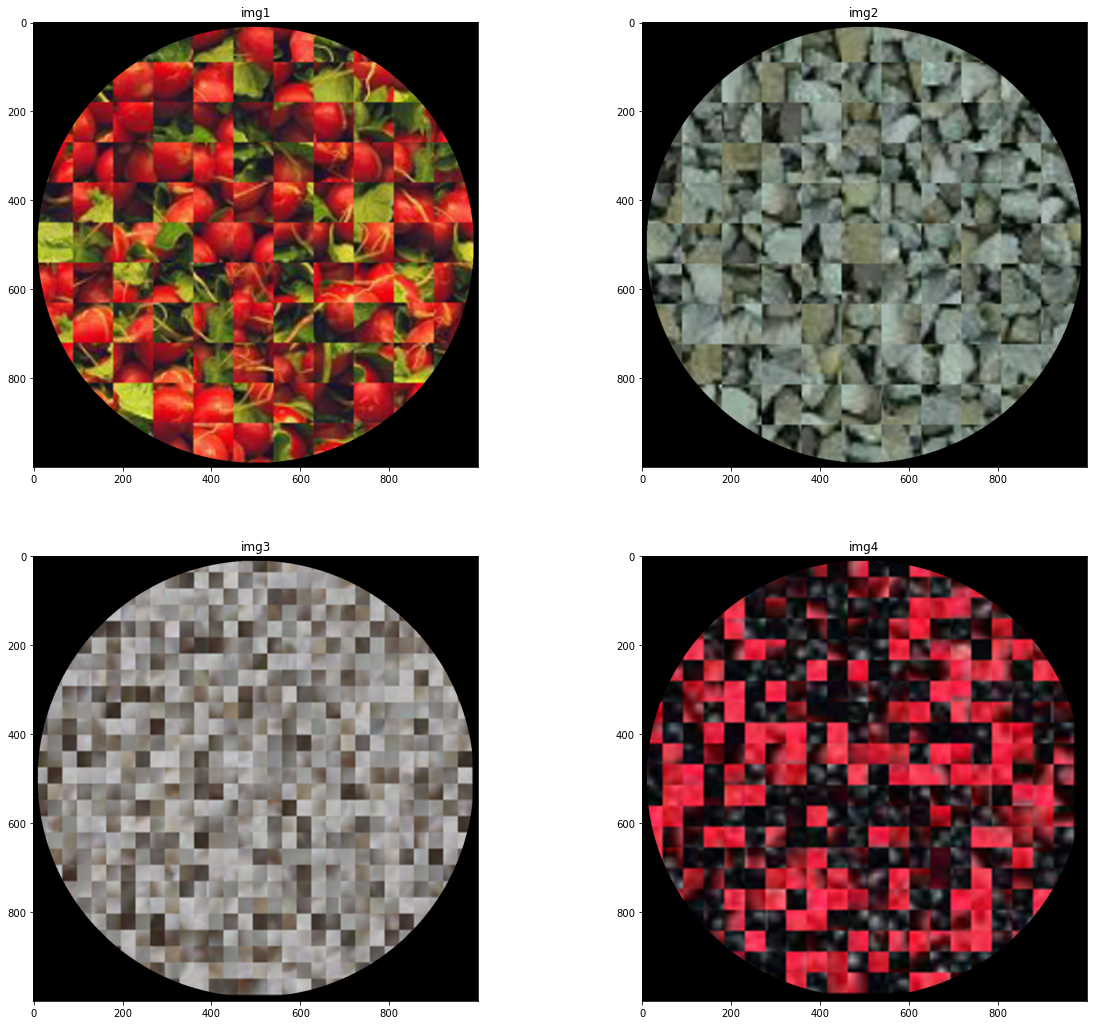

In [63]:
# Display the results
fig, ax = plt.subplots(2, 2, figsize=(20, 18))
ax[0][0].imshow(cv2.cvtColor(maskOnBall(outputTexture1), cv2.COLOR_BGR2RGB))
ax[0][0].set_title('img1')
ax[0][1].imshow(cv2.cvtColor(maskOnBall(outputTexture2), cv2.COLOR_BGR2RGB))
ax[0][1].set_title('img2')
ax[1][0].imshow(cv2.cvtColor(maskOnBall(outputTexture3), cv2.COLOR_BGR2RGB))
ax[1][0].set_title('img3')
ax[1][1].imshow(cv2.cvtColor(maskOnBall(outputTexture4), cv2.COLOR_BGR2RGB))
ax[1][1].set_title('img4')
plt.show()